In [211]:
import os
import pandas as pd
from typing import Dict, List
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


path = "/Users/jeffreychen/Qunat_Interview_Algo/2021 Quant Programming Task/mkt_data"
dir_list = os.listdir(path)
all_data = []
for rd in dir_list:
    print('reading ', rd, '...')
    raw_data = pd.read_csv(path + '/' + rd)
    raw_data['ticker'] = str(rd)[:-4]
    all_data.append(raw_data)
print('all data len ', len(all_data))

#
def cln_df(df: pd.DataFrame):
    cols: List[str] = df.columns
    for col in cols:
        if ' ' in col:
            col_name = col.strip()
            df[col_name] = df[col]
            del df[col]
    return df

all_data = [cln_df(data) for data in all_data]

reading  BLDE.csv ...
reading  TECH.csv ...
reading  SMTC.csv ...
reading  AMZN.csv ...
reading  SHOO.csv ...
reading  PRTS.csv ...
reading  CAL.csv ...
reading  KXIN.csv ...
reading  TTGT.csv ...
reading  XOS.csv ...
all data len  10


In [212]:
def datetime_from_millis(millisec):
    return pd.Timestamp.fromtimestamp(millisec/1000)
def convert_timestamp(df: pd.DataFrame):
    df['time'] = [datetime_from_millis(x) for x in df['timestamp']]
    return df
all_data = [convert_timestamp(data) for data in all_data]

In [187]:
all_data[0][['timestamp','time']]

timestamp                    time
0     1635341400380 2021-10-27 09:30:00.380
1     1635341400481 2021-10-27 09:30:00.481
2     1635341400527 2021-10-27 09:30:00.527
3     1635341400554 2021-10-27 09:30:00.554
4     1635341400555 2021-10-27 09:30:00.555
...             ...                     ...
6274  1635364794789 2021-10-27 15:59:54.789
6275  1635364795073 2021-10-27 15:59:55.073
6276  1635364795878 2021-10-27 15:59:55.878
6277  1635364799229 2021-10-27 15:59:59.229
6278  1635364800144 2021-10-27 16:00:00.144

[6279 rows x 2 columns]

In [153]:
# from datetime import timedelta
# import time
# from pytz import timezone

# def datetime_from_millis(millisec):
#     return pd.to_datetime(datetime.fromtimestamp(millisec/1000, timezone("US/Eastern")).isoformat('T', 'milliseconds'))
# def convert_timestamp(df: pd.DataFrame):
#     df['time'] = [datetime_from_millis(x) for x in df['timestamp']]
#     return df
# all_data = [convert_timestamp(data) for data in all_data]

In [213]:
def get_target_cols(df:pd.DataFrame):
    df['non_cum_vol'] = df["volume"].diff().fillna(df['volume'].iloc[0])
    df['vol %'] = df['non_cum_vol']/(df['volume'].iloc[-1])
    df['spread'] = df['ask_price'] - df['bid_price']
    return df


all_data = [get_target_cols(data) for data in all_data]

In [221]:
def create_15min_agg_data(df:pd.DataFrame):
    try:
        data_15min = df.set_index('time').groupby(pd.Grouper(freq='15min')).agg({'spread': 'mean', 'vol %': 'mean', 'vwap': 'mean'})
        data_15min['ticker'] = df['ticker'].iloc[0]
        # data_15min = data_15min.reset_index()
        return data_15min
    except Exception as e:
        print('error at ticker', df['ticker'].iloc[0])
        print(e)
        print("---")
all_15min_data = [create_15min_agg_data(data) for data in all_data.copy()]

In [222]:
agg_data = pd.concat(all_15min_data, axis=0)
agg_data

spread     vol %      vwap ticker
time                                                    
2021-10-27 09:30:00  0.053575  0.000280  9.780177   BLDE
2021-10-27 09:45:00  0.028989  0.000312  9.827371   BLDE
2021-10-27 10:00:00  0.022069  0.000204  9.838340   BLDE
2021-10-27 10:15:00  0.017911  0.000240  9.843054   BLDE
2021-10-27 10:30:00  0.016708  0.000280  9.850086   BLDE
...                       ...       ...       ...    ...
2021-10-27 15:00:00  0.010000  0.000113  4.543018    XOS
2021-10-27 15:15:00  0.010623  0.000083  4.541534    XOS
2021-10-27 15:30:00  0.012820  0.000103  4.539173    XOS
2021-10-27 15:45:00  0.011158  0.000104  4.534974    XOS
2021-10-27 16:00:00  0.010000  0.000000  4.532920    XOS

[270 rows x 4 columns]

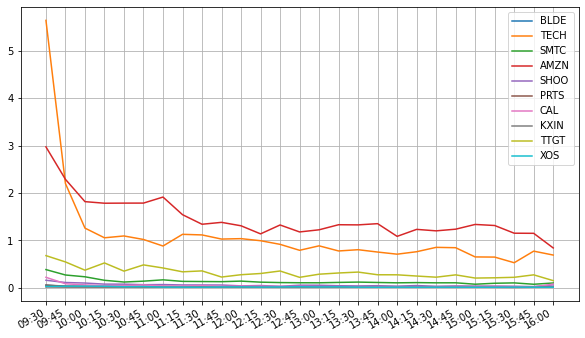

In [239]:
from cProfile import label
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize=(10, 6))

# plt.figure(figsize=(10, 6))
for idx, data in enumerate(all_15min_data):
    ax.plot(data.index, data['spread'], label=data['ticker'].iloc[0])

    labels = [str(x)[-8:-3] for x in data.index] 
    plt.xticks(ticks=all_15min_data[0].index, labels=labels)

    ax.xaxis_date() 
    fig.autofmt_xdate()

    # myLocator = mticker.IndexLocator(base=4, offset=8)
    # ax.xaxis.set_major_locator(myLocator)
ax.grid()
plt.legend()
plt.show()
# sns.lineplot(x='time', y='spread', hue='ticker', data=agg_data)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [ ]:
# data1_min = data1.resample("15min").agg({'bidask_spread':['mean']})


Text(0, 0.5, 'VWAP')

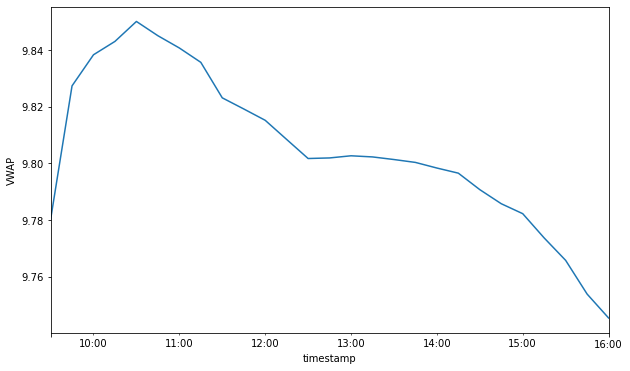

In [65]:
avg_vwap_15min.plot(figsize=(10, 6))
plt.ylabel('VWAP')

Text(0, 0.5, 'avg_vol')

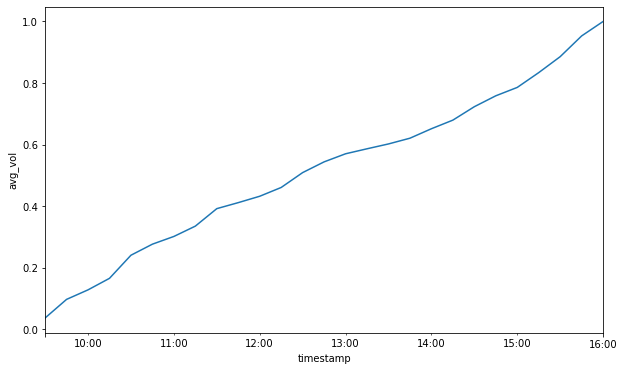

In [69]:
avg_vol_15min.plot(figsize=(10, 6))
plt.ylabel('avg_vol')

Text(0, 0.5, 'spread')

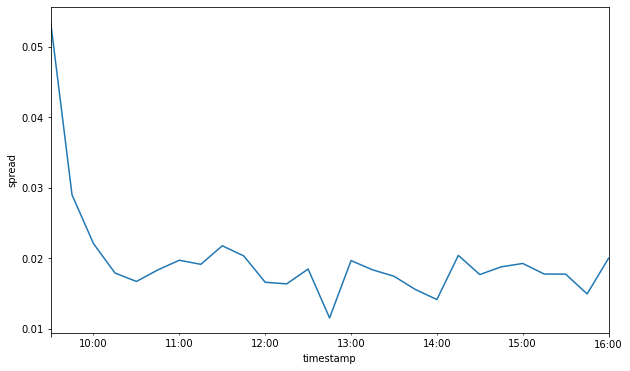

In [68]:
avg_sprd_15min.plot(figsize=(10, 6))
plt.ylabel('spread')

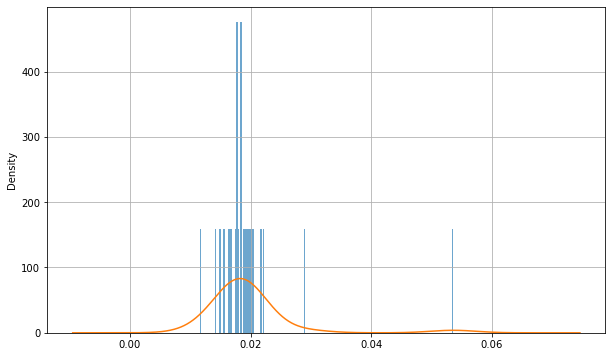

In [63]:
fig, ax = plt.subplots(figsize = (10,6))

# Plot
    # Plot histogram
avg_sprd_15min.plot(kind = "hist", density = True, alpha = 0.65, bins = 180) # change density to true, because KDE uses density
    # Plot KDE
avg_sprd_15min.plot(kind = "kde")
ax.grid(True)
plt.show()
# import numpy as np
# import matplotlib.pyplot as plt

# # Fixing random state for reproducibility
# np.random.seed(19680801)

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# # the histogram of the data
# n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
# plt.grid(True)
# plt.show()

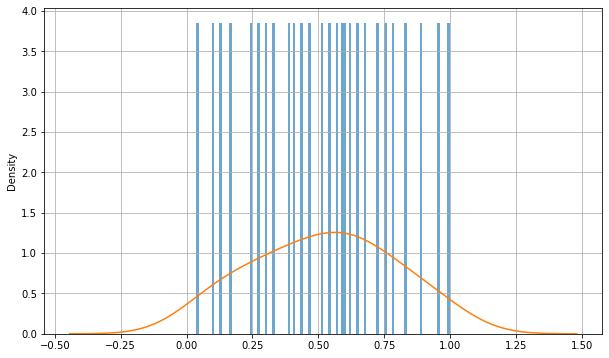

In [19]:
fig, ax = plt.subplots(figsize = (10,6))

# Plot
    # Plot histogram
avg_vol_15min.plot(kind = "hist", density = True, alpha = 0.65, bins = 100) # change density to true, because KDE uses density
    # Plot KDE
avg_vol_15min.plot(kind = "kde")
ax.grid(True)
plt.show()

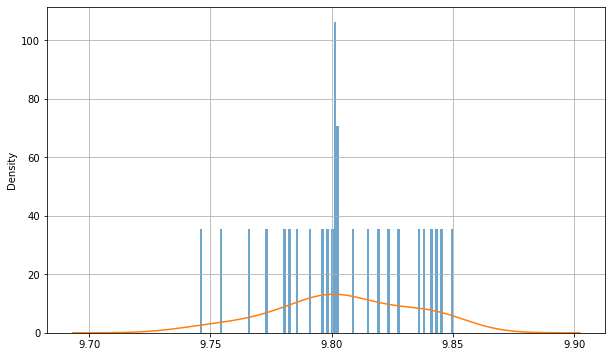

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

# Plot
    # Plot histogram
avg_vwap_15min.plot(kind = "hist", density = True, alpha = 0.65, bins = 100) # change density to true, because KDE uses density
    # Plot KDE
avg_vwap_15min.plot(kind = "kde")
ax.grid(True)
plt.show()

In [21]:
4*60+2*60+30

390

In [22]:
avg_vwap_15min

timestamp
2021-10-27 13:30:00    9.780177
2021-10-27 13:45:00    9.827371
2021-10-27 14:00:00    9.838340
2021-10-27 14:15:00    9.843054
2021-10-27 14:30:00    9.850086
2021-10-27 14:45:00    9.845060
2021-10-27 15:00:00    9.840732
2021-10-27 15:15:00    9.835669
2021-10-27 15:30:00    9.823148
2021-10-27 15:45:00    9.819231
2021-10-27 16:00:00    9.815230
2021-10-27 16:15:00    9.808477
2021-10-27 16:30:00    9.801751
2021-10-27 16:45:00    9.801953
2021-10-27 17:00:00    9.802712
2021-10-27 17:15:00    9.802311
2021-10-27 17:30:00    9.801391
2021-10-27 17:45:00    9.800374
2021-10-27 18:00:00    9.798394
2021-10-27 18:15:00    9.796583
2021-10-27 18:30:00    9.790771
2021-10-27 18:45:00    9.785803
2021-10-27 19:00:00    9.782294
2021-10-27 19:15:00    9.773729
2021-10-27 19:30:00    9.765827
2021-10-27 19:45:00    9.753943
2021-10-27 20:00:00    9.745510
Freq: 15T, Name: vwap, dtype: float64